### Includes
Here are the import all the libraries

In [1]:
%matplotlib inline
import sys
import time
import collections
import operator
import math
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')

## Courses Overview

In [2]:
# loadding preprocessed data
ca = pickle.load(open('tmp/courses.ca.bin', 'rb'))
fr = pickle.load(open('tmp/courses.fr.bin', 'rb'))
df = ca.append(fr)
df = df.sort_values(by='stars', ascending=False)
df.head()

,id,maker,maker.name,flag,stars,players,clears,attempts,create
0,DE4D-0000-035D-3AE1,gizgaz,Buflen,CA,3345,21250,5730,378415,2017-09-12
1,1F6D-0000-0331-75D7,Boss-Man-Gaming,βossMαη,CA,1941,14330,3516,170873,2017-05-22
2,A750-0000-032D-6933,gizgaz,Buflen,CA,1554,11443,2708,113742,2017-05-12
3,345E-0000-034A-976E,Boss-Man-Gaming,βossMαη,CA,1541,11728,2007,164907,2017-07-27
4,B0FD-0000-031D-9C8C,gizgaz,Buflen,CA,1481,11699,2443,130155,2017-04-07


In [3]:
# some informations
print('-courses:', df.shape[0])
print('CA:', ca.shape[0])
print('FR:', fr.shape[0])
print('-makers:', df['maker'].unique().size)
print('-stars:', df['stars'].sum())

-courses: 74969
CA: 34503
FR: 40466
-makers: 32070
-stars: 486934


#### Plot Functions

In [4]:
fontsize = 14
width = 10
height = 5

def plot_line(axis_id, axis_value, title, y, x, color, show_x = False):
    # Plotting Graphs
    fig, axis = plt.subplots()
    range_x = range(0, len(axis_value))
    p1 = plt.plot(range_x, axis_value, color=color)

    plt.ylabel('%s' % (y), fontsize=fontsize)
    plt.xlabel('%s' % (x), fontsize=fontsize)
    plt.title('%s' % (title), fontsize=fontsize)

    if show_x:
        plt.xticks(range_x, axis_id, rotation=90)
    plt.legend((p1[0],), ('Value', ), fontsize=fontsize-3)
    plt.tick_params(axis='both', which='major', labelsize=fontsize-3)
    fig.set_size_inches(width, height)
    plt.tight_layout()
    #plt.savefig('plot-line-%s-%s.pdf' % (y.lower(), x.lower()), dpi=300)
    plt.show()

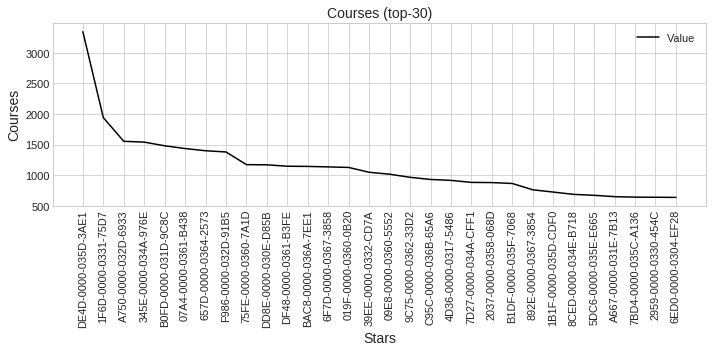

In [5]:
# Getting axis
axis_id = df['id'].tolist()
axis_value = df['stars'].tolist()
limit = 30

# Plots
plot_line(axis_id[0:limit], axis_value[0:limit], 
          'Courses (top-%d)' % (limit), 'Courses', 'Stars', 
          'black', True)

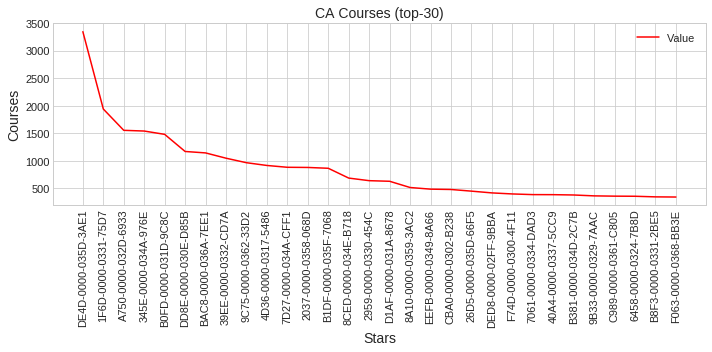

In [6]:
# Getting axis
axis_id = ca['id'].tolist()
axis_value = ca['stars'].tolist()
limit = 30

# Plots
plot_line(axis_id[0:limit], axis_value[0:limit], 
          'CA Courses (top-%d)' % (limit), 'Courses', 'Stars', 
          'red', True)

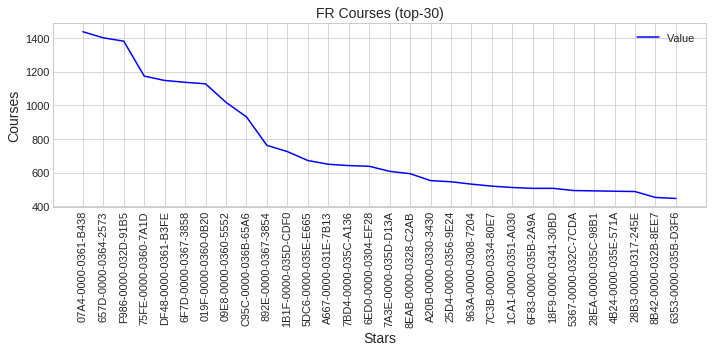

In [7]:
# Getting axis
axis_id = fr['id'].tolist()
axis_value = fr['stars'].tolist()
limit = 30

# Plots
plot_line(axis_id[0:limit], axis_value[0:limit], 
          'FR Courses (top-%d)' % (limit), 'Courses', 'Stars', 
          'blue', True)

## Makers Overview

In [8]:
# loadding preprocessed data
makers_ca = pickle.load(open('tmp/makers.ca.bin', 'rb'))
makers_ca = makers_ca.sort_values(by='stars', ascending=False)
makers_fr = pickle.load(open('tmp/makers.fr.bin', 'rb'))
makers_fr = makers_fr.sort_values(by='stars', ascending=False)
makers_ca.head()

,courses,maker,name,stars,stars.mean
1,13,gizgaz,Buflen,12030,925.384615
0,4,Boss-Man-Gaming,βossMαη,4990,1247.500000
17,50,SeanWhat,SeanWhat,4782,95.640000
13,41,zach-alex,ηiη★Mдгίθ★,4397,107.243902
10,27,Kosten,Kosten,3938,145.851852


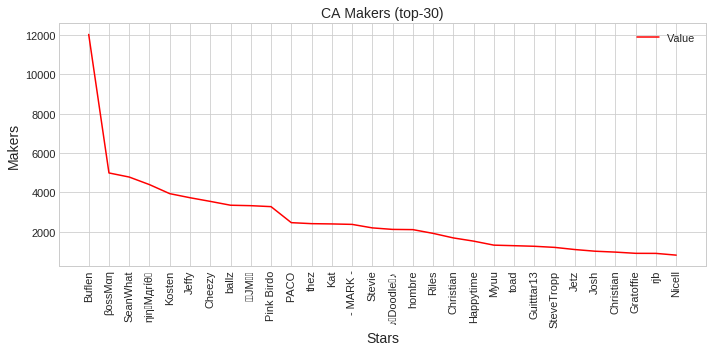

In [9]:
# Getting axis
axis_id = makers_ca['name'].tolist()
axis_value = makers_ca['stars'].tolist()
limit = 30

# Plots
plot_line(axis_id[0:limit], axis_value[0:limit], 
          'CA Makers (top-%d)' % (limit), 'Makers', 'Stars', 
          'red', True)

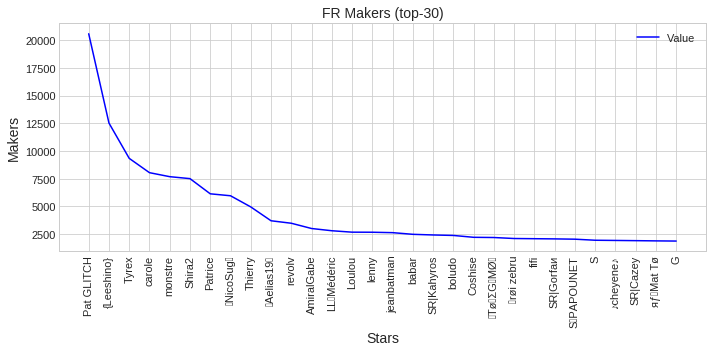

In [10]:
# Getting axis
axis_id = makers_fr['name'].tolist()
axis_value = makers_fr['stars'].tolist()
limit = 30

# Plots
plot_line(axis_id[0:limit], axis_value[0:limit], 
          'FR Makers (top-%d)' % (limit), 'Makers', 'Stars', 
          'blue', True)